In [1]:
# K Nearest Neighbour (classification algorithm) is used in pattern recognition, data mining and intrusin detection.
# It does not require any assumptions about the underlying data distribution
# It can also handle both numerical and categorical data
# K-NN is less sensitive to outliers compared to other algorithms.

# KNN algorithm helps us identify the nearest points or the groups for a query point.
# To determine the closest groups or the nearest points for a query point we need some metric:
# 1.Euclidean Distance: straight line that joins the two points
# 2.Manhattan Distance: used when we are interested in the total distance traveled by the object instead of the displacement
# 3.Minkowski Distance

# Prediction Algorithm:
# 1.Select the optimal value of K
# 2.Calculate distance
# 3.Find the nearest neighbours
# 4.Voting for Classification or Taking Average for Regression:
# In the classification problem, the class labels of are determined by performing majority voting. 
# The class with the most occurrences among the neighbors becomes the predicted class for the target data point.
# In the regression problem, the class label is calculated by taking average of the target values of K nearest neighbors. 
# The calculated average value becomes the predicted output for the target data point.

# Cons:
# High prediction cost (worse for larg data sets)
# Not good with high dimensional data
# Categorical Features don't work well

# Standard Scaler
# https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [32]:
df = pd.read_csv("Classified Data", index_col = 0)

df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


array([[<AxesSubplot:title={'center':'WTT'}>,
        <AxesSubplot:title={'center':'PTI'}>,
        <AxesSubplot:title={'center':'EQW'}>],
       [<AxesSubplot:title={'center':'SBI'}>,
        <AxesSubplot:title={'center':'LQE'}>,
        <AxesSubplot:title={'center':'QWG'}>],
       [<AxesSubplot:title={'center':'FDJ'}>,
        <AxesSubplot:title={'center':'PJF'}>,
        <AxesSubplot:title={'center':'HQE'}>],
       [<AxesSubplot:title={'center':'NXJ'}>,
        <AxesSubplot:title={'center':'TARGET CLASS'}>, <AxesSubplot:>]],
      dtype=object)

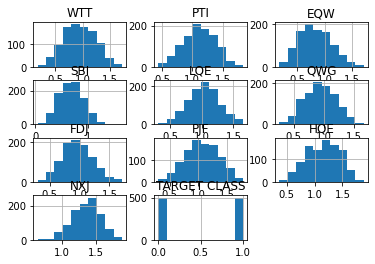

In [33]:
df.hist()

In [34]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [ ]:
# If we focus on the histograms themselves, we can see that many variables have a skewed distribution.
# The dataset provides a good candidate for using scaler transforms as the variables have differing minimum and maximum values, 
# as well as different data distributions.

In [35]:
#Standarize the data

from sklearn.preprocessing import StandardScaler

In [36]:
# initialise the StandardScaler object

scaler = StandardScaler()

In [37]:
# fit the scaler to all columns but the Target one.

scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [38]:
# use the scaler object to do transformation on features

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [48]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [49]:
# scaled version of data
# Now the data is ready to be used by an algorithm

df_features = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])

df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [50]:
df_features.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.141309e-16,-3.198553e-16,-1.181277e-16,-1.766365e-16,-6.170064e-16,2.531308e-17,2.317035e-16,-4.826139e-16,3.438916e-16,4.525824e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


[[<AxesSubplot:title={'center':'WTT'}>
  <AxesSubplot:title={'center':'PTI'}>
  <AxesSubplot:title={'center':'EQW'}>]
 [<AxesSubplot:title={'center':'SBI'}>
  <AxesSubplot:title={'center':'LQE'}>
  <AxesSubplot:title={'center':'QWG'}>]
 [<AxesSubplot:title={'center':'FDJ'}>
  <AxesSubplot:title={'center':'PJF'}>
  <AxesSubplot:title={'center':'HQE'}>]
 [<AxesSubplot:title={'center':'NXJ'}> <AxesSubplot:> <AxesSubplot:>]]


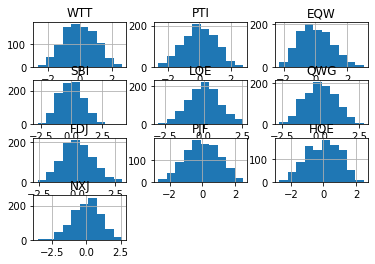

In [51]:
print(df_features.hist())

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df_features
y = df['TARGET CLASS']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
# Try to predict is someone is goin gto be in the target class

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [59]:
y_pred = knn.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(confusion_matrix(y_test, y_pred))

[[146   9]
 [ 11 164]]


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       155
           1       0.95      0.94      0.94       175

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [63]:
# Use Elbow method to choose the correct number of K

In [66]:
# iterate many models using many different k values and plot out their error rate and see which one has the lowest error rate.

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # average of where my predictions were not equal to the actual test values.

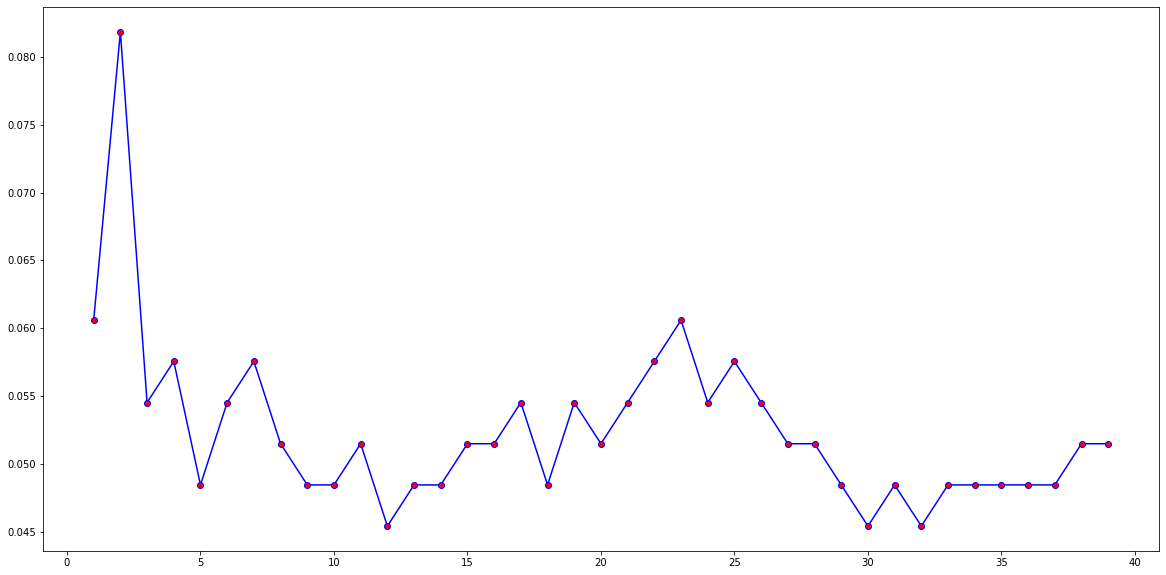

In [68]:
plt.figure(figsize=(20,10))

plt.plot(range(1,40), error_rate, color='blue', marker='o', markerfacecolor='red')

In [30]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test,y_pred))

[[147   8]
 [ 10 165]]

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       155
           1       0.95      0.94      0.95       175

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

